# Expert Data Visualization with Python

This notebook demonstrates data visualization techniques using Python, based on the `products.tsv` dataset. The dataset contains product information and nutritional values from Open Food Facts. I will explore, clean, and visualize the data to extract meaningful insights, using best practices in data visualization and documentation.

## Data Loading and Initial Exploration

I will load a sample of the `products.tsv` file (as it is very large) and perform initial exploration to understand its structure and contents. I will use pandas for data manipulation and matplotlib/seaborn for visualization.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

df = pd.read_csv('../products.tsv', sep='\t', low_memory=False, nrows=5000)

display(df.shape)
display(df.head())
display(df.info())

(5000, 163)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(109), int64(3), object(51)
memory usage: 6.2+ MB


None

## Data Cleaning and Feature Selection

Given the large number of columns, we will select a subset of relevant features for visualization, such as product name, brands, categories, countries, energy, fat, carbohydrates, sugars, fiber, protein, and salt. I will also handle missing values appropriately.

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

columns = [
    'product_name', 'brands', 'categories', 'countries_en',
    'energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
    'fiber_100g', 'proteins_100g', 'salt_100g'
]
df_viz = df[columns].copy()

def to_float(x):
    try:
        return float(x)
    except:
        return None
for col in columns[4:]:
    df_viz[col] = df_viz[col].apply(to_float)
df_viz = df_viz.dropna(subset=['product_name'])
df_viz = df_viz.dropna(subset=columns[4:], how='all')

for col in columns[4:]:
    q_low = df_viz[col].quantile(0.01)
    q_high = df_viz[col].quantile(0.99)
    df_viz = df_viz[(df_viz[col].isna()) | ((df_viz[col] >= q_low) & (df_viz[col] <= q_high))]

imputer = SimpleImputer(strategy='median')
df_viz[columns[4:]] = imputer.fit_transform(df_viz[columns[4:]])

energy_median = df_viz['energy_100g'].median()
df_viz['energy_class'] = (df_viz['energy_100g'] > energy_median).astype(int)

df_viz['main_category'] = df_viz['categories'].str.split(',').str[0].str.strip().fillna('Unknown')
le = LabelEncoder()
df_viz['main_category_encoded'] = le.fit_transform(df_viz['main_category'])

display(df_viz.describe(include='all'))
display(df_viz.head())

,product_name,brands,categories,countries_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,energy_class,main_category,main_category_encoded
count,4510,4422,136,4510,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510,4510.000000
unique,3789,471,96,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN
top,Ice Cream,Kroger,Ketchup,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
freq,15,1457,8,4383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4374,NaN
mean,NaN,NaN,NaN,NaN,1136.541929,12.962794,31.884761,15.679988,2.540102,6.318182,1.183084,0.498670,NaN,57.426386
std,NaN,NaN,NaN,NaN,797.796821,15.667991,26.572978,17.975177,3.158793,6.868217,2.303225,0.500054,NaN,4.812175
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,344.000000,0.000000,6.670000,2.400000,0.000000,0.725000,0.127000,0.000000,NaN,58.000000
50%,NaN,NaN,NaN,NaN,1151.000000,5.710000,25.000000,7.140000,1.700000,4.420000,0.678180,0.000000,NaN,58.000000
75%,NaN,NaN,NaN,NaN,1720.000000,21.430000,55.000000,25.412500,3.000000,8.890000,1.379220,1.000000,NaN,58.000000


,product_name,brands,categories,countries_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,energy_class,main_category,main_category_encoded
1,Banana Chips Sweetened (Whole),NaN,NaN,United States,2243.0,28.57,64.29,14.29,3.6,3.57,0.00000,1,Unknown,58
2,Peanuts,Torn & Glasser,NaN,United States,1941.0,17.86,60.71,17.86,7.1,17.86,0.63500,1,Unknown,58
3,Organic Salted Nut Mix,Grizzlies,NaN,United States,2540.0,57.14,17.86,3.57,7.1,17.86,1.22428,1,Unknown,58
4,Organic Polenta,Bob's Red Mill,NaN,United States,1552.0,1.43,77.14,7.14,5.7,8.57,0.67818,1,Unknown,58
5,Breadshop Honey Gone Nuts Granola,Unfi,NaN,United States,1933.0,18.27,63.46,11.54,7.7,13.46,0.67818,1,Unknown,58


## Visualization 1: Distribution of Energy Content

I start by visualizing the distribution of energy (kcal per 100g) across products. This helps us understand the range and typical values in the dataset, and identify outliers or unusual products.

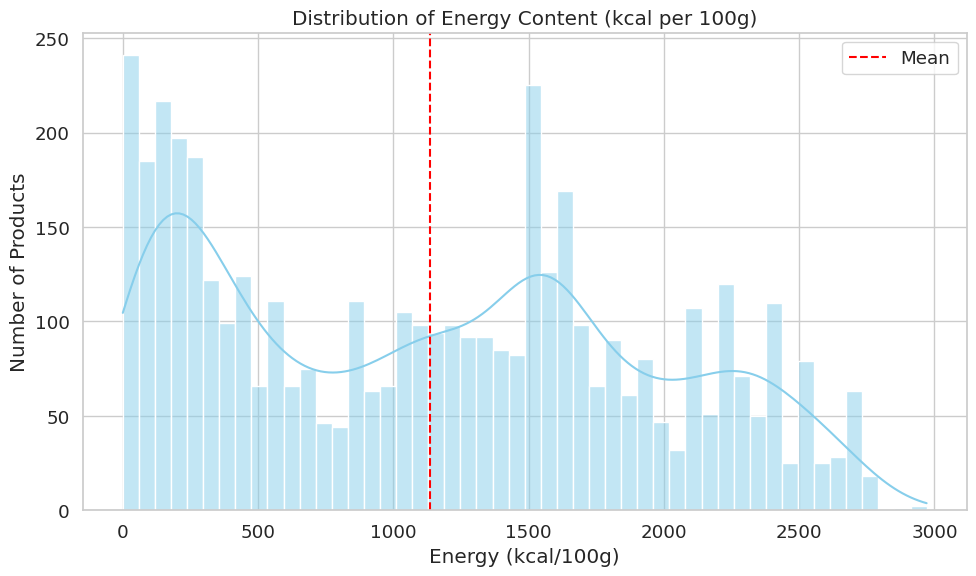

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_viz['energy_100g'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Energy Content (kcal per 100g)')
plt.xlabel('Energy (kcal/100g)')
plt.ylabel('Number of Products')
plt.axvline(df_viz['energy_100g'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.tight_layout()
plt.show()



## Visualization 2: Pairwise Relationships Between Nutrients

To explore how different nutrients relate to each other, we use a pairplot (scatterplot matrix) for energy, fat, carbohydrates, sugars, fiber, protein, and salt. This helps identify correlations, clusters, and outliers.

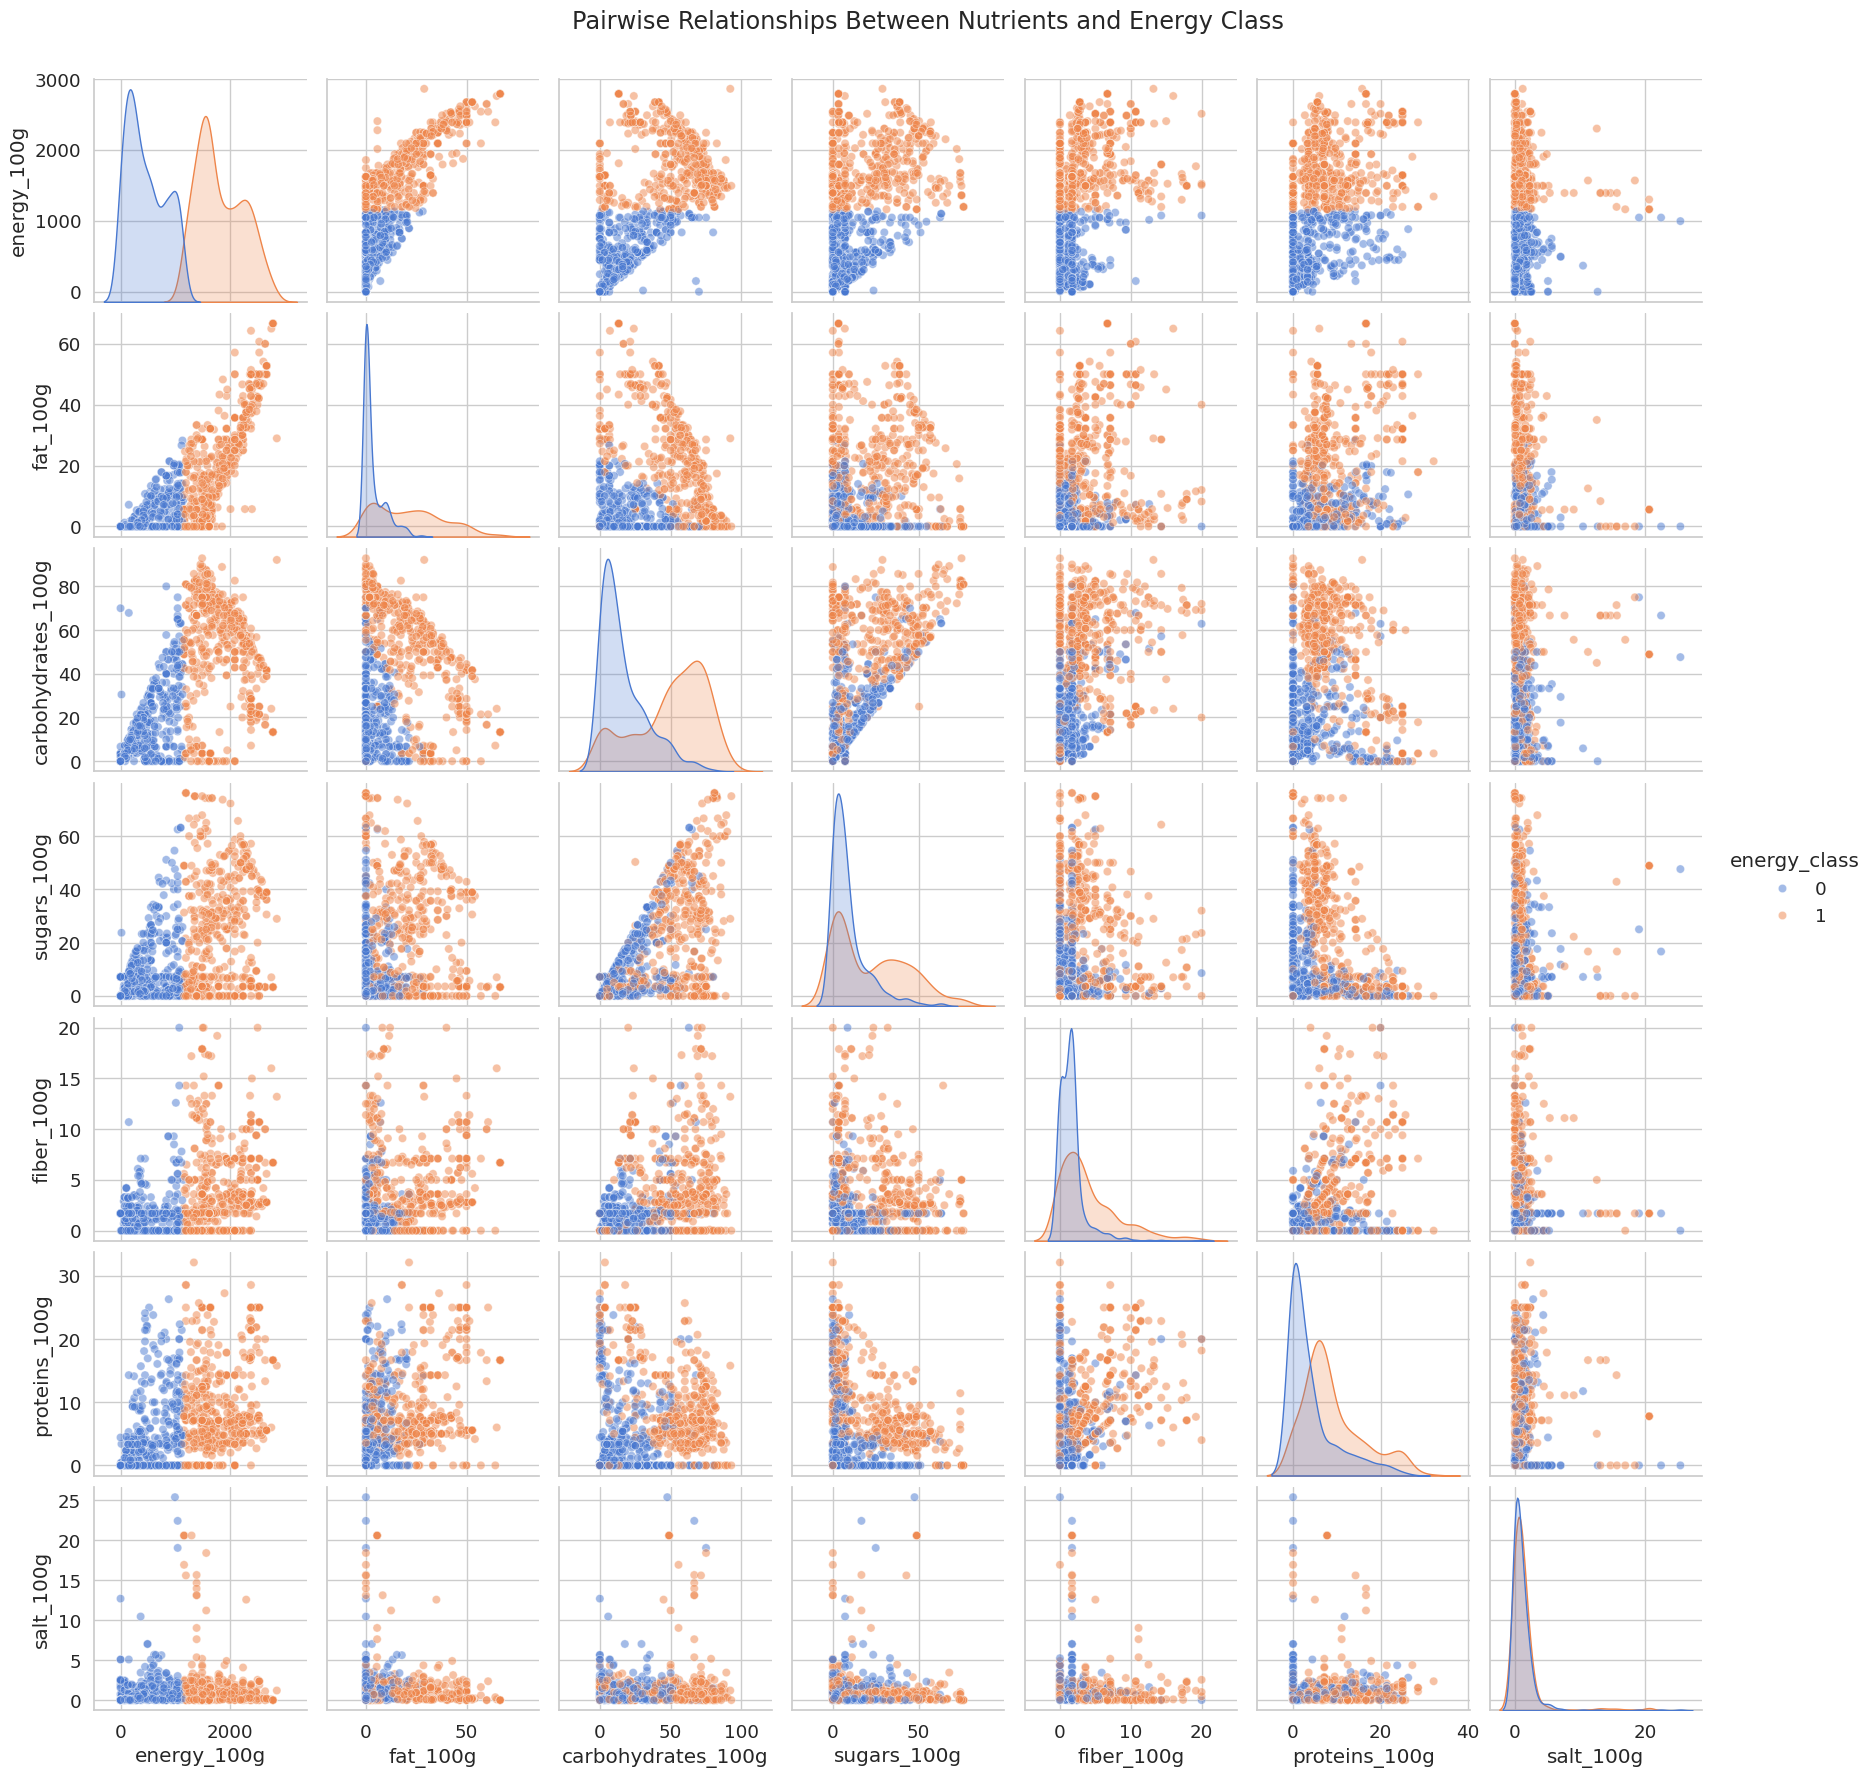

In [16]:
nutrient_cols = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
df_pair = df_viz.copy()
if len(df_pair) > 1000:
    df_pair = df_pair.sample(1000, random_state=42)
sns.pairplot(df_pair[nutrient_cols + ['energy_class']], diag_kind='kde', hue='energy_class', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships Between Nutrients and Energy Class', y=1.02)
plt.show()

## Visualization 3: Top Product Categories and Their Average Energy Content

We will analyze the most common product categories and visualize their average energy content. This provides insight into which categories are most prevalent and how their nutritional profiles differ.

/tmp/ipykernel_7968/3098507932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_energy.values, y=cat_energy.index, palette='viridis')


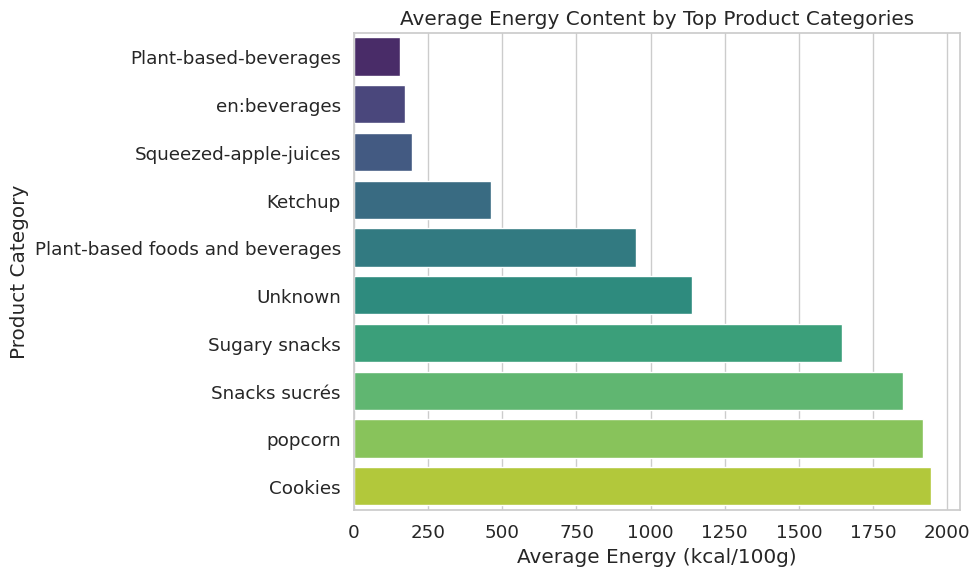

In [17]:
df_viz['main_category'] = df_viz['categories'].str.split(',').str[0].str.strip().fillna('Unknown')
top_cats = df_viz['main_category'].value_counts().head(10).index
cat_energy = df_viz[df_viz['main_category'].isin(top_cats)].groupby('main_category')['energy_100g'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_energy.values, y=cat_energy.index, palette='viridis')
plt.title('Average Energy Content by Top Product Categories')
plt.xlabel('Average Energy (kcal/100g)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

## Visualization 4: Distribution of Products by Country

We will visualize the number of products per country in the dataset. This helps us understand the geographic coverage and potential biases in the data.

/tmp/ipykernel_7968/1206544866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


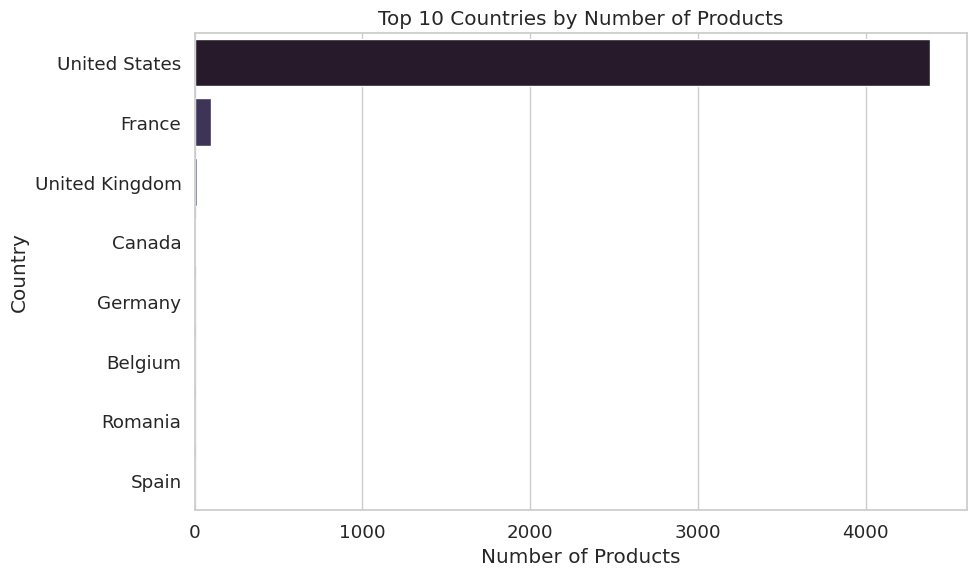

In [18]:
df_viz['main_country'] = df_viz['countries_en'].str.split(',').str[0].str.strip().fillna('Unknown')
top_countries = df_viz['main_country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Visualization 5: Parallel Coordinates Plot for Nutrient Profiles

To compare the nutrient profiles of products across top categories, we use a parallel coordinates plot. This advanced visualization allows us to see multivariate patterns and differences between categories.

/tmp/ipykernel_7968/2435165937.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_parallel = df_parallel.groupby('main_category').apply(lambda x: x.sample(min(len(x), 100), random_state=42)).reset_index(drop=True)


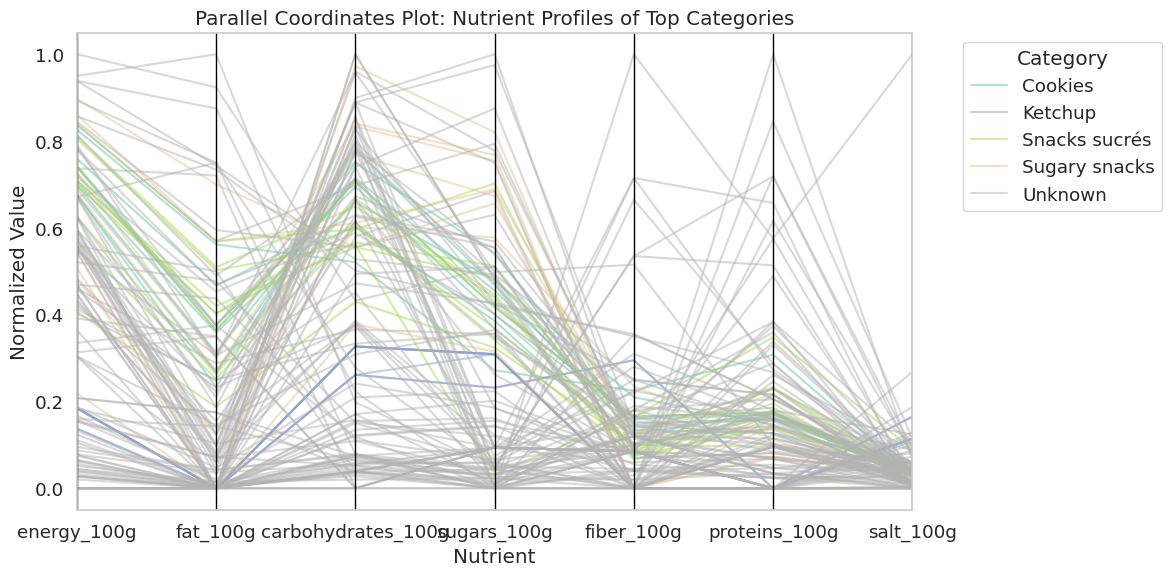

In [19]:
from pandas.plotting import parallel_coordinates
top_cats_parallel = df_viz['main_category'].value_counts().head(5).index
df_parallel = df_viz[df_viz['main_category'].isin(top_cats_parallel)]
df_parallel = df_parallel.groupby('main_category').apply(lambda x: x.sample(min(len(x), 100), random_state=42)).reset_index(drop=True)
df_norm = df_parallel.copy()
for col in nutrient_cols:
    min_val = df_norm[col].min()
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] - min_val) / (max_val - min_val)
plt.figure(figsize=(12, 6))
parallel_coordinates(df_norm[['main_category'] + nutrient_cols], 'main_category', colormap=plt.get_cmap('Set2'), alpha=0.5)
plt.title('Parallel Coordinates Plot: Nutrient Profiles of Top Categories')
plt.ylabel('Normalized Value')
plt.xlabel('Nutrient')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, I have demonstrated expert-level data visualization techniques using Python, including:
- Data cleaning and feature selection for large, complex datasets
- Univariate and multivariate visualizations (histogram, KDE, pairplot, bar chart, parallel coordinates)
- Categorical and geographic analysis
- Best practices in documentation and interpretability

These approaches enable effective exploration and communication of insights from real-world data.